In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

### PCA
<img src="python 1.png" width=600/>

In [2]:
def pca(X):
    '''
    X (m x n) : Data points.
    
    return : Computes eigenvectors of matrix Sigma
             and returns U (n x n) & S (n x n).
             Here, S (n x n) should be  a 'diagonal matrix', 
                   but reduced to (1, n) as just non zero diagonal.
                                     
                                     1 0 0
                                S =  0 2 0
                                     0 0 3
                                
                                S =  1 2 3
    '''
    m, n = X.shape
    U = np.empty((n, n))
    S = np.empty((n, n))
    
    Sigma = (1/m) * (X.T @ X)
    
    # Singular Value Decomposition
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S

In [3]:
def project_data(X, U, K):
    '''
    "Dimensionality Reduction"
    
    X (m x n) : Data points.
    U (n x n) : Got from pca(X).
    K (int) : No. of new dimensions / Reduced dimension from n.
    
    return : Z (m x K), X reduced to K dimensions rather than n.
    '''
    m, n = X.shape
    Z = np.empty((m, K))
    
    Ureduce = U[:, :K]       # n x K
    Z = X @ Ureduce          # m x K
    
    return Z                 # m x K

In [4]:
def recover_data(Z, U, K):
    '''
    Z (m x K) : Reduced X.
    U (n x n) : Got from pca(X). Used to construct Ureduce (n x K).
    K (int) : No. of new dimensions / Reduced dimension from n.
    
    return : Reconstructed X (m x n) from Z (m x K).
    '''
    X_recovered = np.empty((Z.shape[0], U.shape[1]))   # m x n
    
    Ureduce = U[:, :K]          # n x K         
    X_recovered = Z @ Ureduce.T
    
    return X_recovered

<img src="python 2.png" width=600/>

In [45]:
def choose_K(S, variance):
    '''
    "Choose no. of principal components"
    
    S (1 x n) : Got from pca(X).
    variance (float) : Percentage of variance retained.
               e.g. variance = 0.95 means, 95 % variance is retained.
    
    return : K (int), smallest possible no. of principal component
    '''
    n = len(S)
    for k in range(1, n):
        if (np.sum(S[:k]) / np.sum(S)) >= variance:
            return k

### Example 1

In [6]:
mat = loadmat('..\datasets\ex7data1.mat')
X = mat['X']
X.shape

(50, 2)

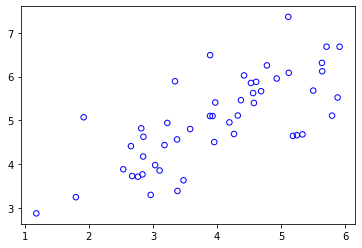

In [7]:
# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolor='none', edgecolor='b', s=30)

In [8]:
# Feature Scaling
scalar = StandardScaler()
X_norm = scalar.fit_transform(X)

In [9]:
U, S = pca(X_norm)

In [10]:
# Feature converted n = 2 to 1
K = 1
Z = project_data(X_norm, U, K)
Z.shape

(50, 1)

In [11]:
# Reconstructing the data
X_recovered = recover_data(Z, U, K)
X_recovered.shape

(50, 2)

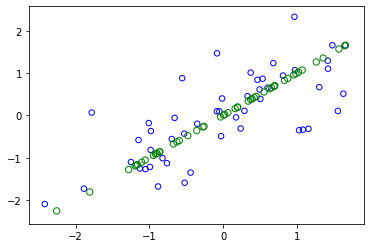

In [12]:
# Visualizing reconstructed data
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker='o', facecolor='none', edgecolor='b', s=30)
plt.scatter(X_recovered[:, 0], X_recovered[:, 1], marker='o', facecolor='none', edgecolor='g', s=40)

### Example 2 (PCA of face)

In [13]:
mat2 = loadmat('..\datasets\ex7faces.mat')
X2 = mat2['X']
# 5000 face images each of shape (32 x 32)
X2.shape

(5000, 1024)

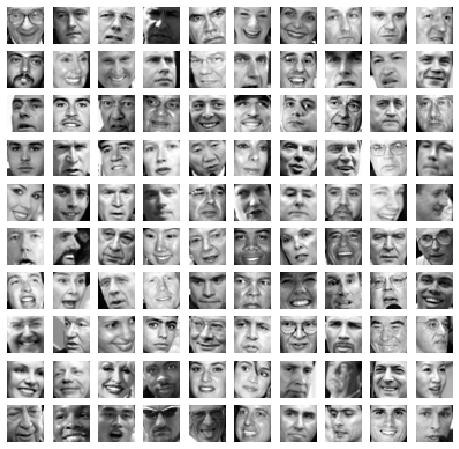

In [14]:
# Visualizing the data
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
img_idx = 0
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(X2[img_idx].reshape(32, 32, order='F'), cmap='gray')
        ax[i, j].axis('off')
        img_idx += 50

In [15]:
# Feature Scaling
X2_norm = scalar.fit_transform(X2)

# Run PCA
U2, S2 = pca(X2_norm)

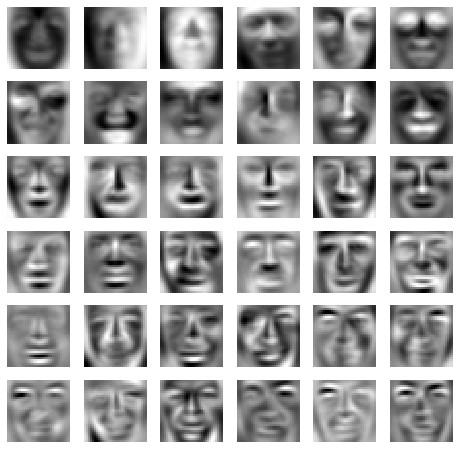

In [16]:
# Visualizing top 36 eigenvectors found
Ureduce = U2[:, :36].T
fig, ax = plt.subplots(6, 6, figsize=(8, 8))
img_idx = 0
for i in range(6):
    for j in range(6):
        ax[i, j].imshow(Ureduce[img_idx].reshape(32, 32, order='F'), cmap='gray')
        ax[i, j].axis('off')
        img_idx += 1

In [46]:
print('90% variance is retained for K =', choose_K(S2, variance=0.90))
print('95% variance is retained for K =', choose_K(S2, variance=0.95))
print('99% variance is retained for K =', choose_K(S2, variance=0.99))

90% variance is retained for K = 69
95% variance is retained for K = 130
99% variance is retained for K = 335


In [38]:
# Reduce feature from (32 x 32) = 1024 to (10 x 10) = 100
K2 = 100
Z2 = project_data(X2_norm, U2, K2)
Z2.shape

(5000, 100)

In [39]:
# Data Reconstruction
X2_recovered = recover_data(Z2, U2, K2)

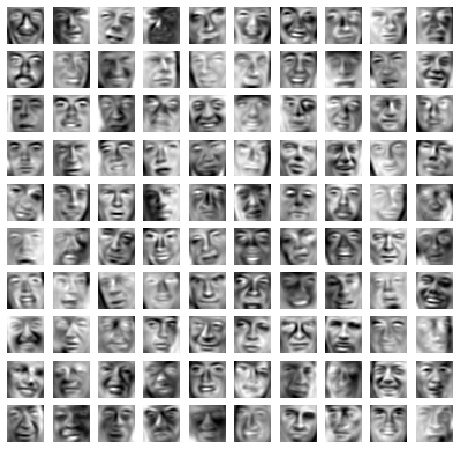

In [40]:
# Visualizing reduced dimensioned data
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
img_idx = 0
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(X2_recovered[img_idx].reshape(32, 32, order='F'), cmap='gray')
        ax[i, j].axis('off')
        img_idx += 50